In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import warnings

In [15]:
df = pd.read_excel('C:/AnBui/Learning_materials/Personal_project/Dataset/ttc-subway-delay-data-2022.xlsx')

# Data Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19895 entries, 0 to 19894
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       19895 non-null  datetime64[ns]
 1   Time       19895 non-null  object        
 2   Day        19895 non-null  object        
 3   Station    19895 non-null  object        
 4   Code       19895 non-null  object        
 5   Min Delay  19895 non-null  int64         
 6   Min Gap    19895 non-null  int64         
 7   Bound      14349 non-null  object        
 8   Line       19856 non-null  object        
 9   Vehicle    19895 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.5+ MB


In [17]:
df.head()

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle
0,2022-01-01,15:59,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023
1,2022-01-01,02:23,Saturday,SPADINA BD STATION,MUIS,0,0,NaN,BD,0
2,2022-01-01,22:00,Saturday,KENNEDY SRT STATION TO,MRO,0,0,NaN,SRT,0
3,2022-01-01,02:28,Saturday,VAUGHAN MC STATION,MUIS,0,0,NaN,YU,0
4,2022-01-01,02:34,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981


In [18]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.describe().T)

categorical_features = df.select_dtypes('object')
print(categorical_features.describe().T)  

             count         mean          std  min  25%     50%     75%     max
Min Delay  19895.0     3.674592    12.002604  0.0  0.0     0.0     4.0   458.0
Min Gap    19895.0     5.333702    12.656578  0.0  0.0     0.0     8.0   463.0
Vehicle    19895.0  3571.591505  2646.618442  0.0  0.0  5192.0  5701.0  8871.0
         count unique            top   freq
Time     19895   1406          22:00    660
Day      19895      7         Friday   3085
Station  19895    296  FINCH STATION   1191
Code     19895    179           MUIS   1952
Bound    14349      5              S   4909
Line     19856     21             YU  10637


In [19]:
df.isnull().sum()

Date            0
Time            0
Day             0
Station         0
Code            0
Min Delay       0
Min Gap         0
Bound        5546
Line           39
Vehicle         0
dtype: int64

In [20]:
total_rows = df.shape[0]
proportion_missing_bound = df['Bound'].isnull().sum()/total_rows *100
proportion_missing_line = df['Line'].isnull().sum()/total_rows *100

print(f"Proportion of missing values in Bound: {proportion_missing_bound}\nProportion of missing values in Line: {proportion_missing_line}")

Proportion of missing values in Bound: 27.87635084192008
Proportion of missing values in Line: 0.19602915305353105


The proportion of missing values in Bound variable accounted for 27.8%. It is quite impossible to impute the missing values based on other features such as "Station", "Line", "Vehicle".

The proportion of missing values in Line aaccounted for a small proportion 

In this case, it is decided to drop the missing values.

In [21]:
df.dropna(subset=['Bound', 'Line'], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 0 to 19894
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14344 non-null  datetime64[ns]
 1   Time       14344 non-null  object        
 2   Day        14344 non-null  object        
 3   Station    14344 non-null  object        
 4   Code       14344 non-null  object        
 5   Min Delay  14344 non-null  int64         
 6   Min Gap    14344 non-null  int64         
 7   Bound      14344 non-null  object        
 8   Line       14344 non-null  object        
 9   Vehicle    14344 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 1.2+ MB


After dropping he DF now has 14344 rows

The "time", " feature should be convereted to datetime type for further analysis later on.

In [23]:
df['Time'] = pd.to_datetime(df['Time'], format ='%H:%M').dt.time

In [24]:
df['Datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str))
df.dtypes

Date         datetime64[ns]
Time                 object
Day                  object
Station              object
Code                 object
Min Delay             int64
Min Gap               int64
Bound                object
Line                 object
Vehicle               int64
Datetime     datetime64[ns]
dtype: object

In [12]:
df.head(5)

,Date,Time,Day,Station,Code,Min Delay,Min Gap,Bound,Line,Vehicle,Datetime
0,2022-01-01,15:59:00,Saturday,LAWRENCE EAST STATION,SRDP,0,0,N,SRT,3023,2022-01-01 15:59:00
4,2022-01-01,02:34:00,Saturday,EGLINTON STATION,MUATC,0,0,S,YU,5981,2022-01-01 02:34:00
9,2022-01-01,07:43:00,Saturday,WILSON STATION,TUATC,10,0,S,YU,5896,2022-01-01 07:43:00
11,2022-01-01,07:54:00,Saturday,FINCH STATION,MUSC,0,0,N,YU,5481,2022-01-01 07:54:00
16,2022-01-01,08:12:00,Saturday,FINCH STATION,TUNOA,6,12,S,YU,0,2022-01-01 08:12:00


As we can see, most of the columns with Null Routes have Min Delay as 0 also. We do not need 0 minute delay bus records as we are exploring Delay of the subway. 

So we will filtered out all the 0 Min Delay rows.

In [13]:
df = df[df['Min Delay'] !=0]

### Exploratory Data Analysis

#### Univariate analysis

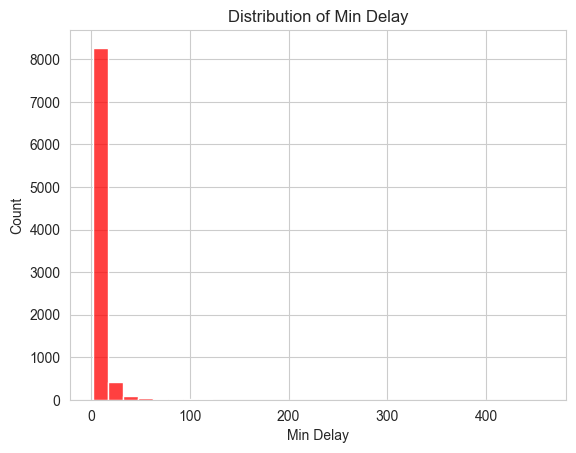

In [14]:
sns.set_style('whitegrid')

plt.Figure(figsize=(10,6))
sns.histplot(df['Min Delay'], bins = 30, kde = False, color = 'red')
plt.title('Distribution of Min Delay')
plt.xlabel('Min Delay')
plt.ylabel('Count')
plt.show()

From the plot, we can observe the following:

The majority of delays are quite short, mostly ranging between 0 to around 10 minutes.

There are a few delays that extend beyond this range, but they are less frequent.

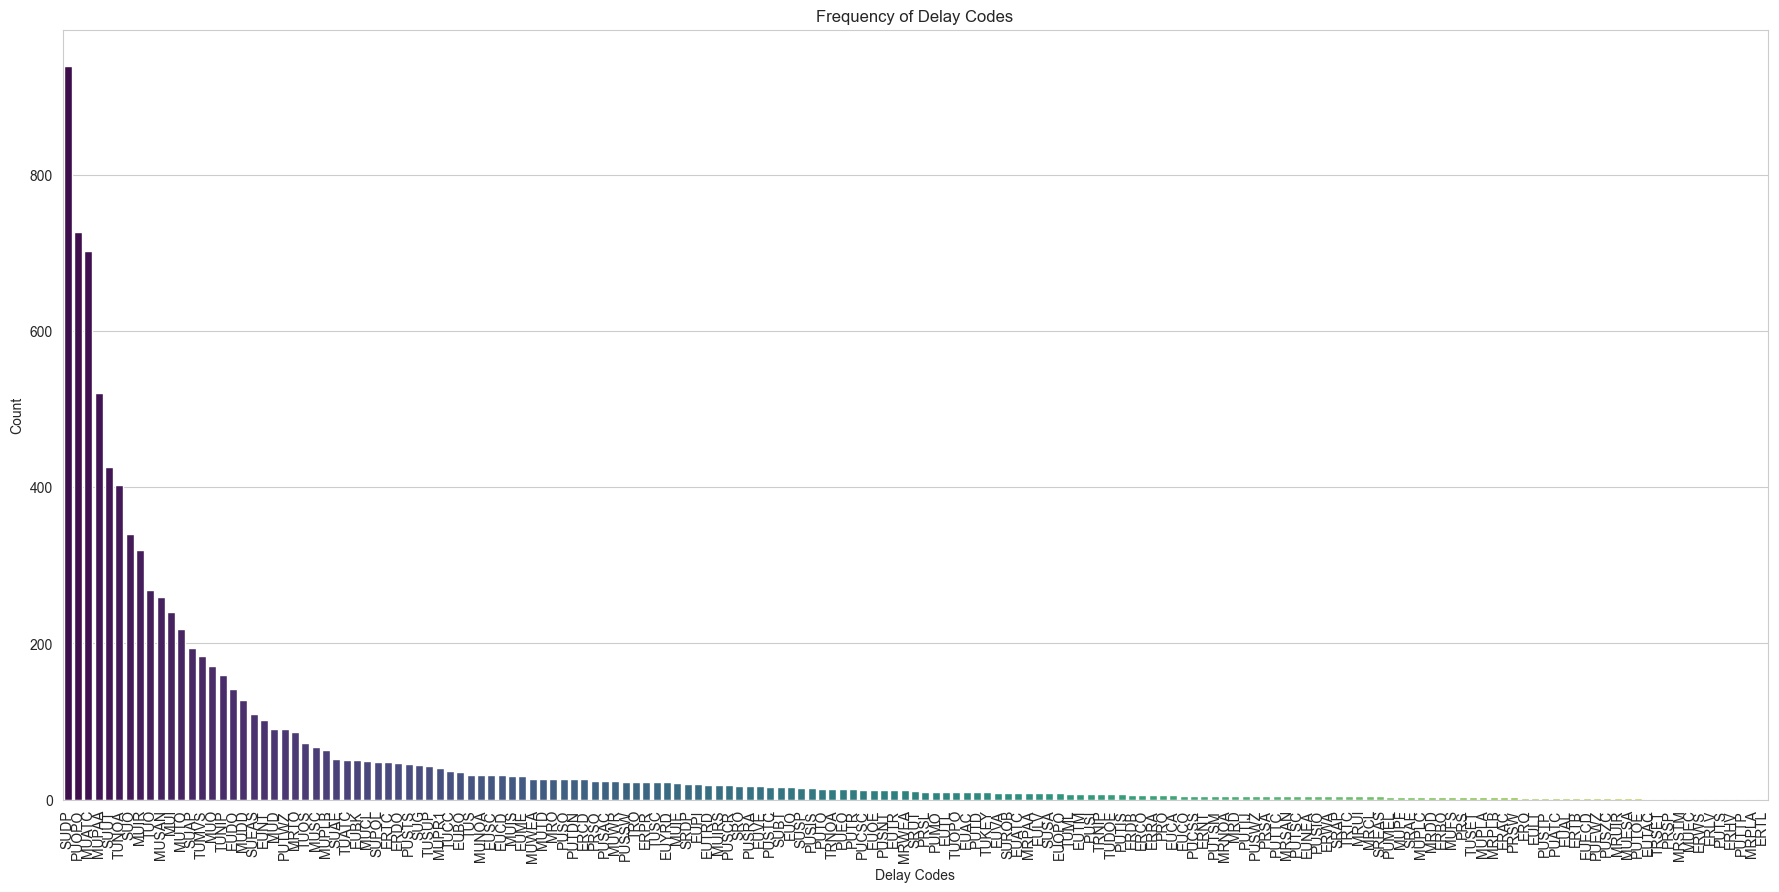

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(22,10))
sns.countplot(data=df, x='Code', order = df['Code'].value_counts().index, palette='viridis')
plt.title('Frequency of Delay Codes')
plt.xlabel('Delay Codes')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

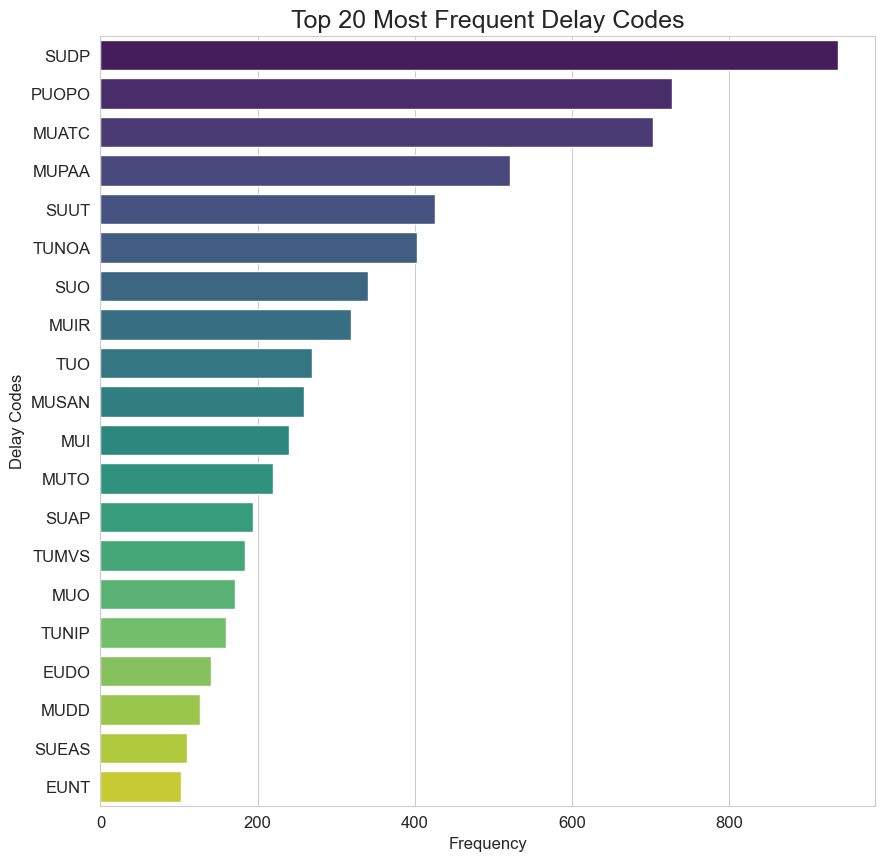

In [16]:
# Plot the horizontal bar chart for the 'Code' column to show the top 20 most common reasons for delays
top_20_codes = df['Code'].value_counts().index[:20]

plt.figure(figsize=(10,10))
sns.countplot(data=df, y='Code', order=top_20_codes, palette='viridis')

# Adjust the font sizes for better readability
plt.title('Top 20 Most Frequent Delay Codes', fontsize=18)
plt.ylabel('Delay Codes', fontsize=12)
plt.xlabel('Frequency', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


As we can see, SUDP, PUOPO, MUATC, MUPAA, SUUT are the top 5 codes (incidents) with highest frequency 

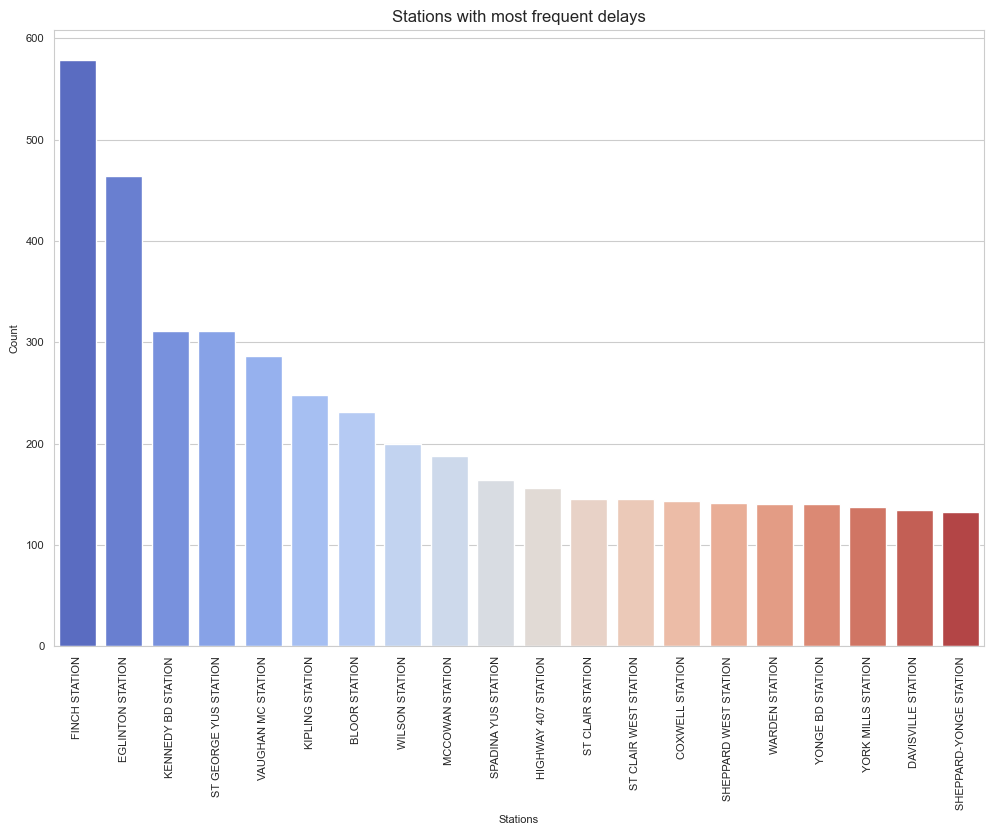

In [17]:
top_20_stations = df['Station'].value_counts().index[:20]
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Station', order=top_20_stations, palette='coolwarm')
plt.title('Stations with most frequent delays', fontsize = 12)
plt.xlabel('Stations', fontsize = 8)
plt.ylabel('Count', fontsize = 8)
plt.xticks(rotation=90, fontsize =8)
plt.yticks(fontsize=8)
plt.show()

The bar chart showed that Finch, Englinton are the stations with the highest frequency of delays among stations. Kennedy BD had the same frequency of delays as ST George YUS stations.

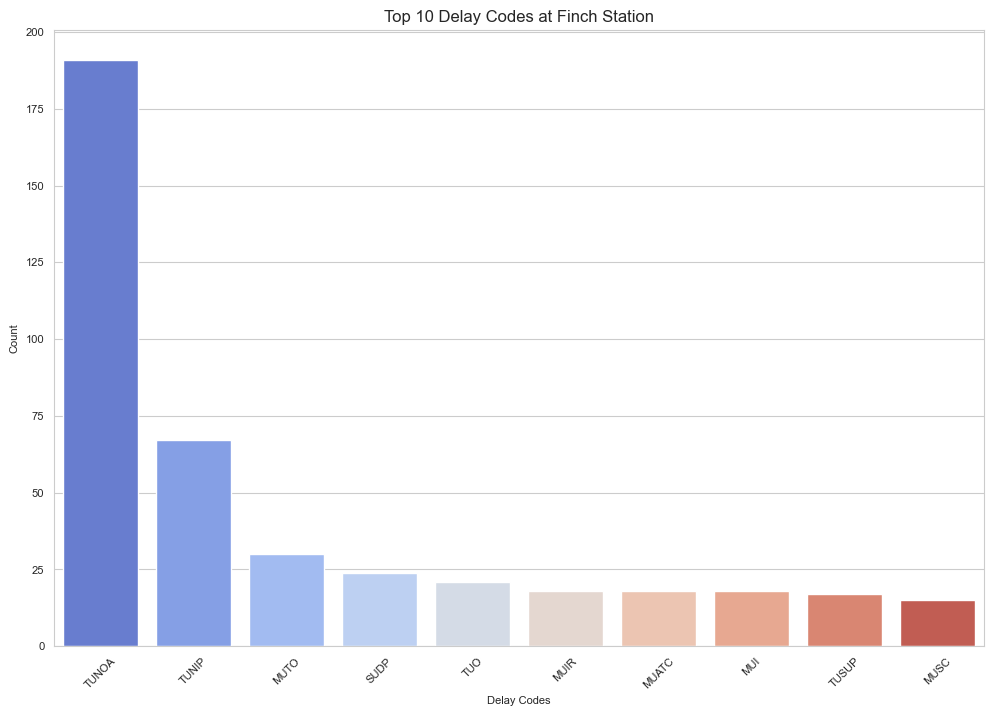

In [18]:
#Create a new dataframe to see the highest number of delays at Finch Station
#Plot a bar chart to show the top 10 delay codes at Finch Station

df_finch_station = df.loc[df['Station'] =='FINCH STATION']
df_finch_station_delay = df_finch_station.groupby(['Code'])['Min Delay'].sum().reset_index().sort_values(by=['Min Delay'], ascending=False)
df_finch_station_delay

top_10_finch_codes = df_finch_station['Code'].value_counts().index[:10]
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
sns.countplot(data=df_finch_station, x='Code', order=top_10_finch_codes,palette='coolwarm')
plt.xlabel('Delay Codes', fontsize = 8)
plt.ylabel('Count',fontsize=8)
plt.title('Top 10 Delay Codes at Finch Station', fontsize = 12)
plt.xticks(rotation=45, fontsize =8)
plt.yticks(fontsize=8)
plt.show()


TUNOA, TUNIP and MUTO were the top 3 codes that had the highest Min Delay.

#### Bivariate analysis

In [19]:
from scipy.stats import pointbiserialr 

def calculate_pointbiserials(df, column):
    print(f"Calculating pointbiserial for column {column}")
    return pointbiserialr(df[column].astype('category').cat.codes, df['Min Delay'])[0] 

correlation = {
    'Day': calculate_pointbiserials(df, 'Day'),
    'Bound': calculate_pointbiserials(df, 'Bound'),
    'Line': calculate_pointbiserials(df, 'Line'),
    'Station': calculate_pointbiserials(df, 'Station'),
}

print(f"Correlation: {correlation}")

Calculating pointbiserial for column Day
Calculating pointbiserial for column Bound
Calculating pointbiserial for column Line
Calculating pointbiserial for column Station
Correlation: {'Day': 0.01137736979990881, 'Bound': 0.004320468842971656, 'Line': -0.0447230792835986, 'Station': 0.017465131222779005}


All the correlation coefficients are very close to zero, suggesting that there is a very weak relationship between these categorical variables ('Day', 'Bound', 'Line', 'Station') and the continuous variable ('Min Delay'). Therefore, it's likely that these variables alone do not have a strong predictive power for the length of delays.

In [24]:
# Create Month_Year column from Datetime column and count the number of delays per month

df['Month_Year'] = pd.to_datetime(df['Datetime']).dt.to_period('M')
time_series_count = df.groupby('Month_Year').size().reset_index(name='Number of Delays')
time_series_count

,Month_Year,Number of Delays
0,2022-01,918
1,2022-02,758
2,2022-03,753
3,2022-04,757
4,2022-05,719
5,2022-06,706
6,2022-07,647
7,2022-08,672
8,2022-09,778
9,2022-10,780


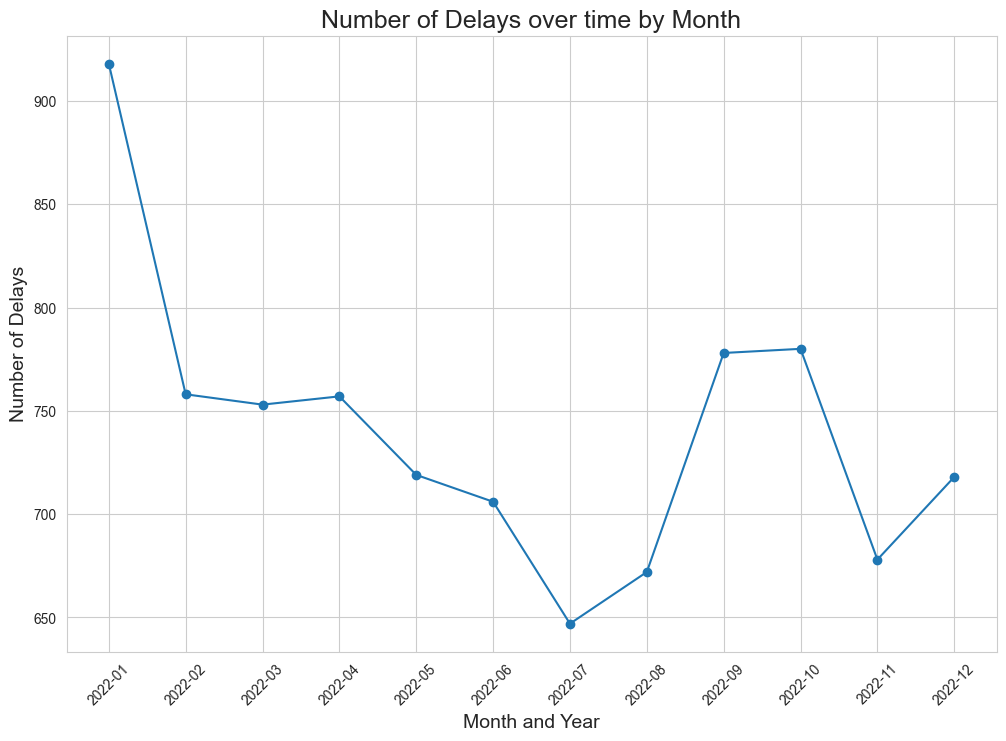

In [25]:
plt.figure(figsize=(12,8))
plt.plot(time_series_count['Month_Year'].astype(str), time_series_count['Number of Delays'], marker='o')
plt.xticks(rotation=45)
plt.title('Number of Delays over time by Month', fontsize = 18)
plt.xlabel('Month and Year', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.grid(True)
plt.show()

Overall, the number of delays showed a downtrend over time by Month.

In [29]:
import calendar
df['Weekday'] = df['Datetime'].dt.weekday
df['weekday_name']=df['Weekday'].apply(lambda x: calendar.day_name[x])
weekday_count = df.groupby('weekday_name').size().reset_index(name='Number of Delays')

weekday_order=list(calendar.day_name)
weekday_count['weekday_name']=pd.Categorical(weekday_count['weekday_name'],categories = weekday_order, ordered=True)
weekday_count = weekday_count.sort_values('weekday_name')

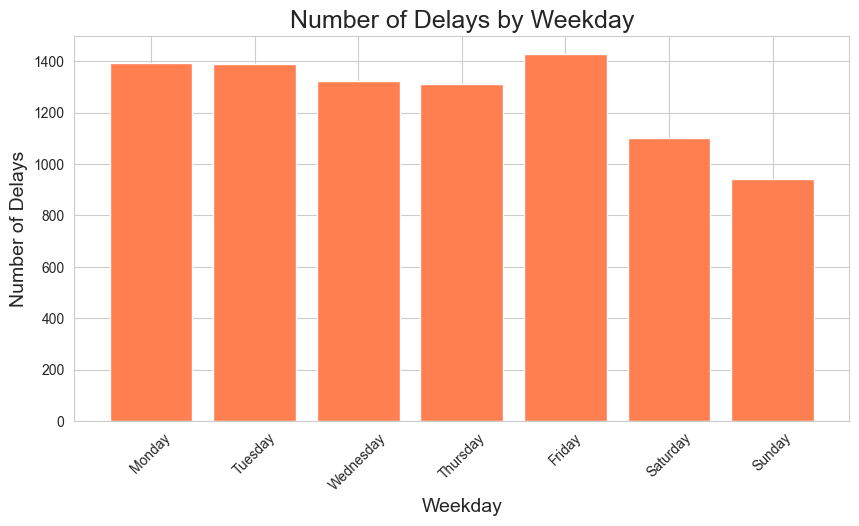

In [43]:
plt.figure(figsize=(10,5))
plt.bar(weekday_count['weekday_name'], weekday_count['Number of Delays'], color='coral')
plt.title('Number of Delays by Weekday', fontsize=18)
plt.xlabel('Weekday',fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.xticks(rotation=45)
plt.show()

The number of delays was at peaked on Friday while it is noticeably lower during the weekends (Saturday and Sunday).

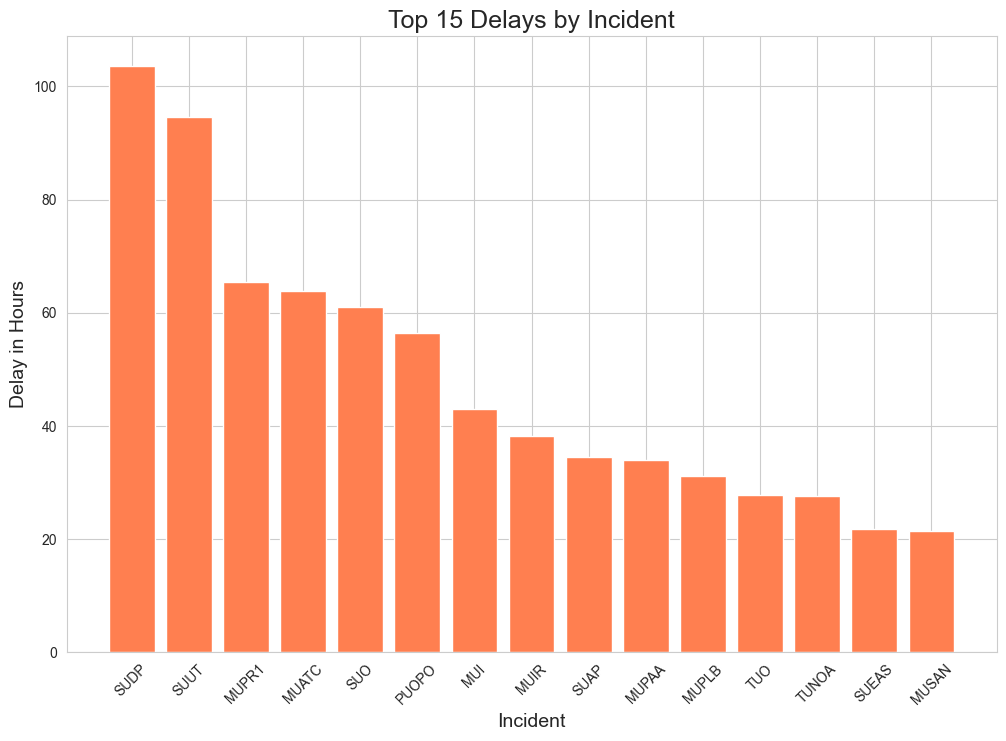

In [47]:
incident = df.groupby(['Code'])['Min Delay'].sum()/60 #convert to hours
df_incident = pd.DataFrame({'labels': incident.index, 'values': incident.values})
df_incident = df_incident.sort_values(by='values', ascending=False)
top_15_incident = df_incident[:15]

plt.figure(figsize=(12,8))
plt.bar(top_15_incident['labels'], top_15_incident['values'], color='coral')
plt.title('Top 15 Delays by Incident', fontsize=18)
plt.xlabel('Incident', fontsize=14)
plt.ylabel('Delay in Hours', fontsize=14)
plt.xticks(rotation=45)
plt.show()

SUDP, SUUT are the top Codes that had the highest delay in hours.

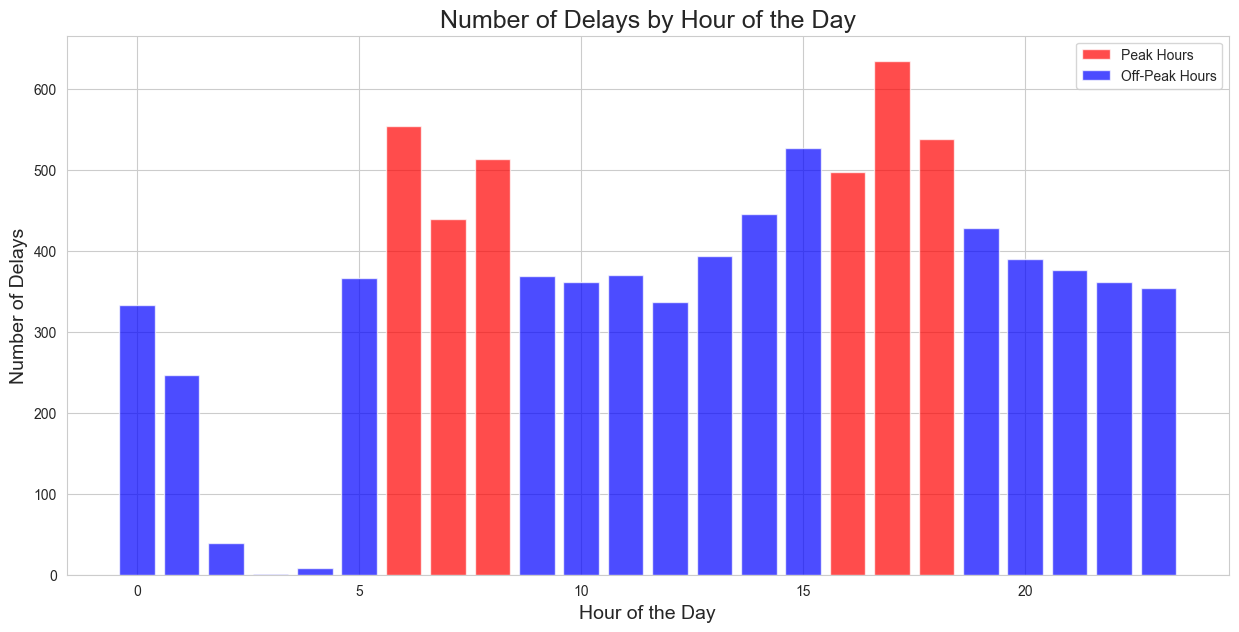

In [31]:
df['Hour'] = df['Datetime'].dt.hour
#Define peak and off-peak hours
peak_hours = list(range(6, 9)) + list(range(16, 19))
off_peak_hours = list(set(range(0, 24)) - set(peak_hours))

# Filter the data for peak and off-peak hours
df_peak = df[df['Hour'].isin(peak_hours)]
df_off_peak = df[df['Hour'].isin(off_peak_hours)]

# Count the number of delays during peak and off-peak hours
peak_count = df_peak.groupby('Hour').size().reset_index(name='Number_of_Delays')
off_peak_count = df_off_peak.groupby('Hour').size().reset_index(name='Number_of_Delays')

# Plotting the data
plt.figure(figsize=(15, 7))

# Peak hours
plt.bar(peak_count['Hour'], peak_count['Number_of_Delays'], color='red', alpha=0.7, label='Peak Hours')

# Off-peak hours
plt.bar(off_peak_count['Hour'], off_peak_count['Number_of_Delays'], color='blue', alpha=0.7, label='Off-Peak Hours')

plt.title('Number of Delays by Hour of the Day', fontsize=18)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Delays', fontsize=14)
plt.legend()
plt.grid(True, axis='y')
plt.show()

The number of delays is higher during peak hours than off-peak hours. This is expected as there are more people travelling during peak hours than off-peak hours.

In [32]:
# Groupby weekday_name and Code, and aggregate number of incidents and total min delay
weekday_incident_duration = df.groupby(['weekday_name','Code']).agg(
    number_of_incidents = pd.NamedAgg(column='Code', aggfunc='count'),
    total_min_delay = pd.NamedAgg(column='Min Delay', aggfunc='sum')
).reset_index()

# Order the weekday_name column by the day of the week
weekday_order = list(calendar.day_name)
weekday_incident_duration['weekday_name'] = pd.Categorical(weekday_incident_duration['weekday_name'], categories=weekday_order, ordered=True)

# Sort by weekday_name and total min delay
weekday_incident_duration = weekday_incident_duration.sort_values(['weekday_name', 'total_min_delay'], ascending=[True, False])
weekday_incident_duration

,weekday_name,Code,number_of_incidents,total_min_delay
220,Monday,SUDP,150,988
157,Monday,MUATC,143,840
174,Monday,MUPR1,6,664
190,Monday,PUOPO,150,632
228,Monday,SUUT,54,632
...,...,...,...,...
407,Sunday,PUTR,1,5
397,Sunday,PUSCR,1,4
406,Sunday,PUTIJ,1,4
386,Sunday,MUWEA,1,3


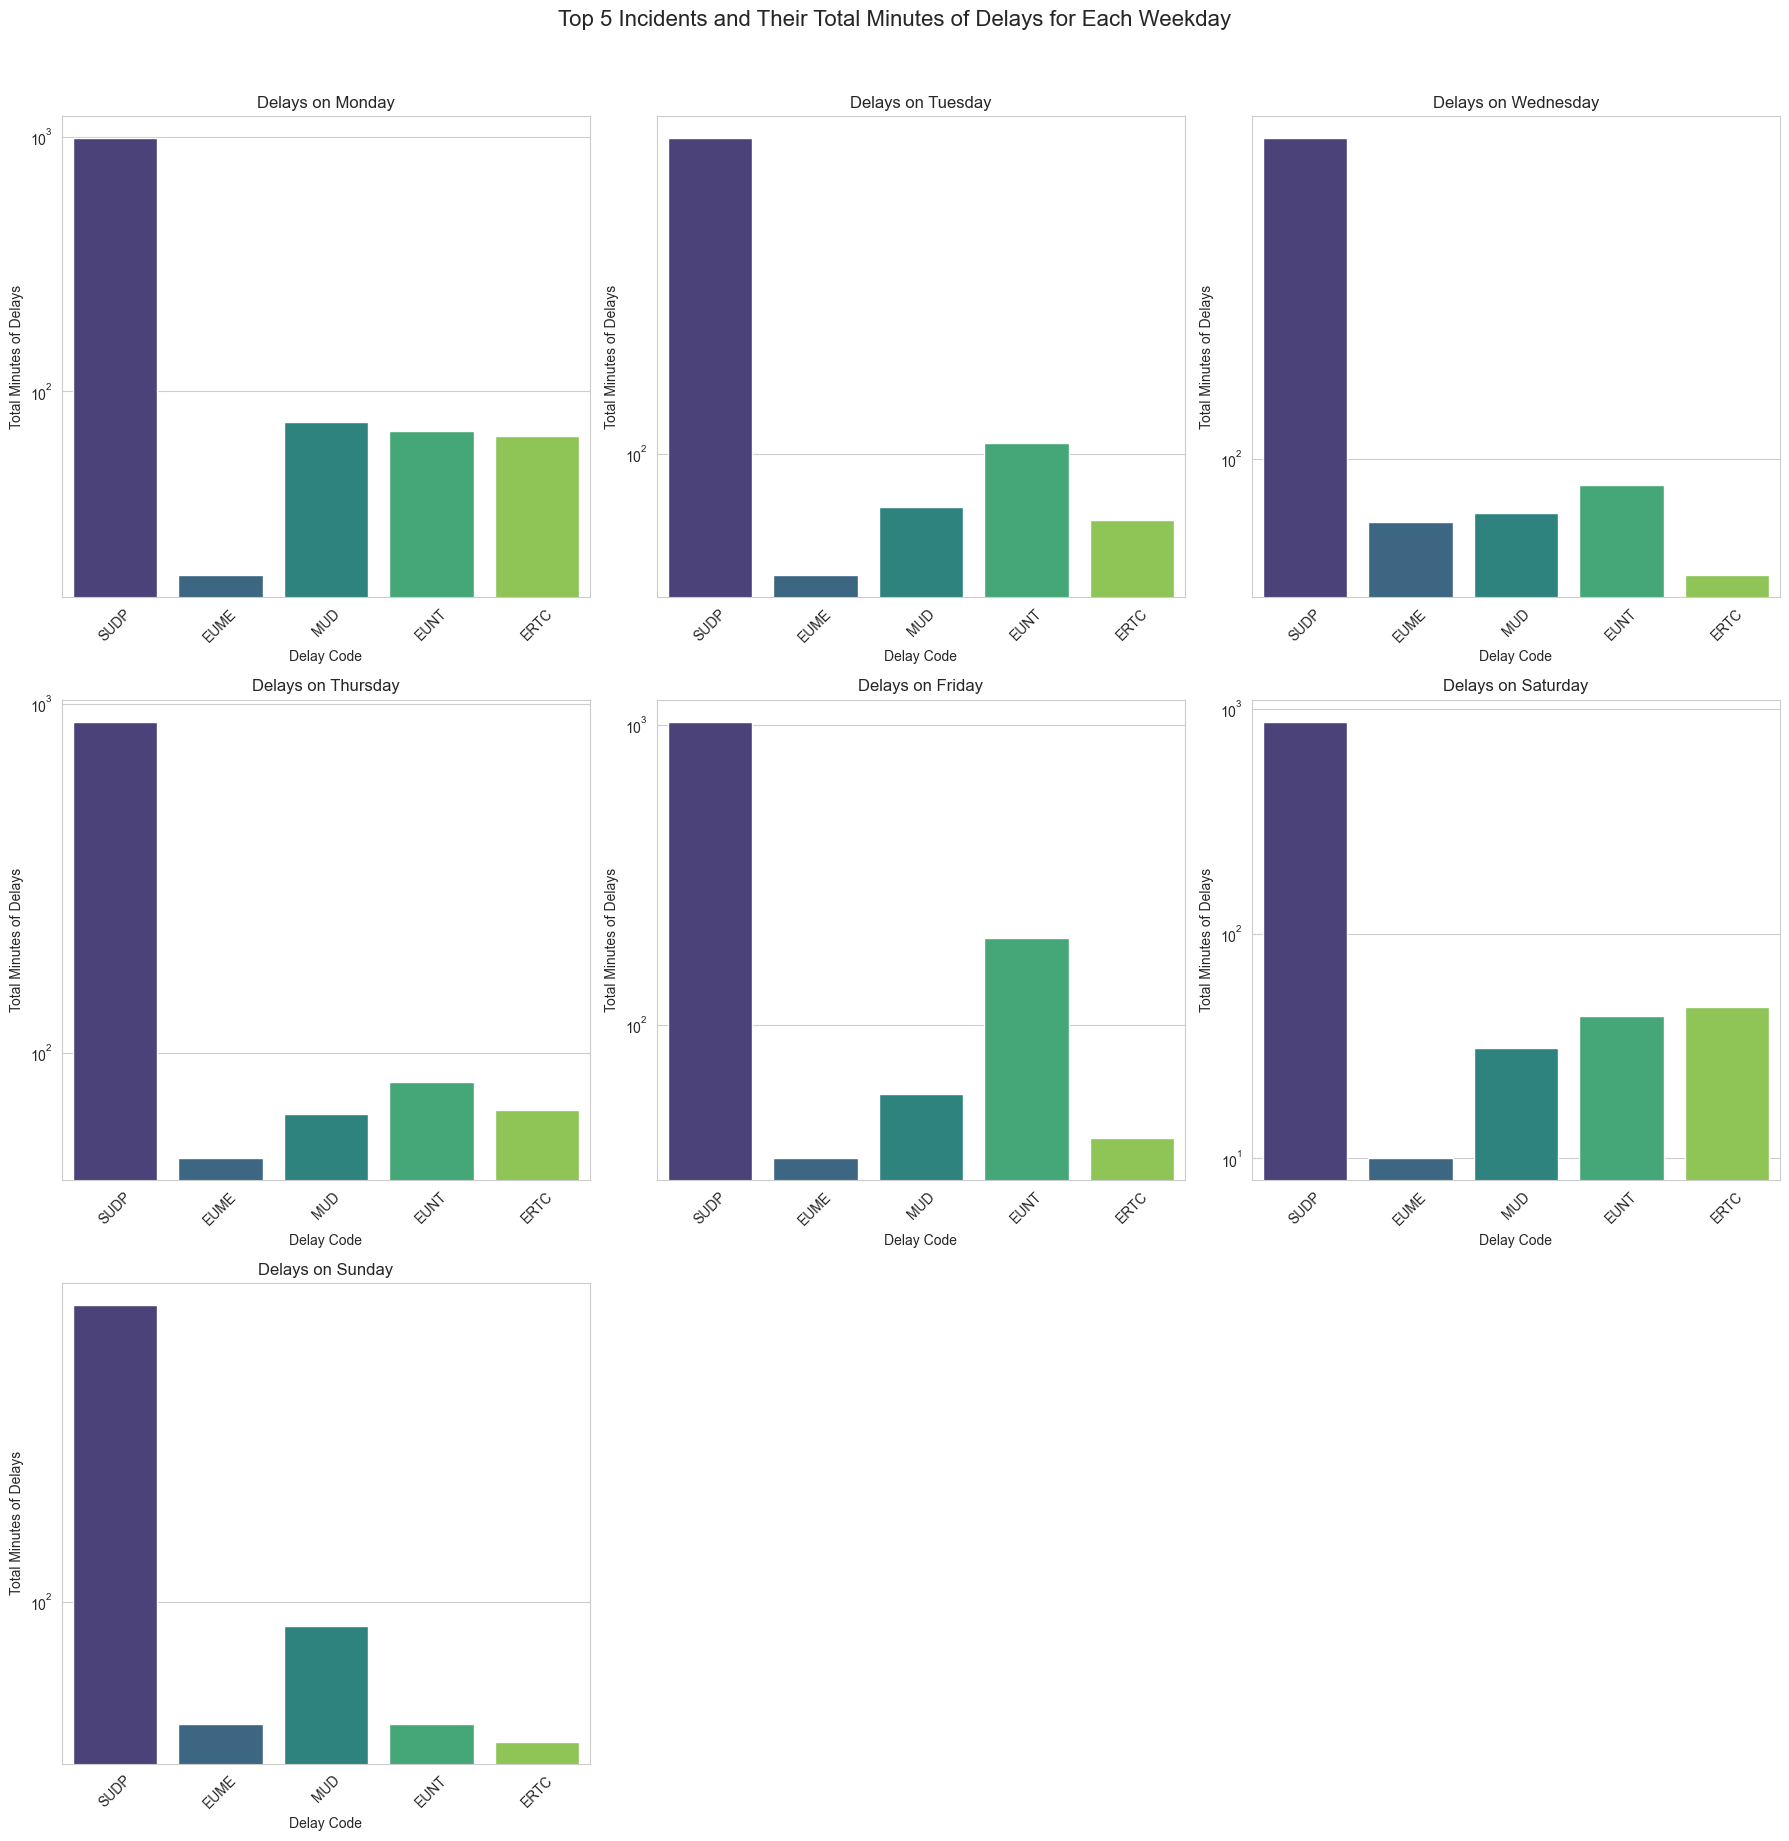

In [33]:
# Select the top 5 most frequent delay codes
top_codes = weekday_incident_duration['Code'].value_counts().index[:5]

# Create subplots with 3 columns
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))

# Flatten the axes array
axes = axes.flatten()

# Create a bar plot for each weekday
for i, weekday in enumerate(weekday_order):
    ax = axes[i]
    
    # Filter data for the specific weekday and only keep rows with top 5 codes
    data = weekday_incident_duration[(weekday_incident_duration['weekday_name'] == weekday) & 
                                     (weekday_incident_duration['Code'].isin(top_codes))]
    
    # Create the bar plot
    sns.barplot(x="Code", y="total_min_delay", data=data, ax=ax, palette="viridis", order=top_codes)
    
    # Customize the plot
    ax.set_title(f"Delays on {weekday}")
    ax.set_xlabel("Delay Code")
    ax.set_ylabel("Total Minutes of Delays")
    ax.set_yscale("log")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)

# Remove any extra subplots
for i in range(len(weekday_order), len(axes)):
    fig.delaxes(axes[i])

# Add a title for the entire figure
plt.suptitle('Top 5 Incidents and Their Total Minutes of Delays for Each Weekday', fontsize=16, y=1.02)

# Adjust the layout
plt.tight_layout()

plt.show()